In [11]:
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
import pandas as pd
import scipy

In [2]:

data = pd.read_csv('mnist_train.csv')
data = np.array(data)
losses = []
accuracies = []
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [4]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [5]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def compute_loss(Y, Y_hat):
    one_hot_Y = one_hot(Y)
    L_sum = np.sum(np.multiply(one_hot_Y, np.log(Y_hat)))
    m = Y.shape[0]
    L = -(1/m) * L_sum
    return L

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            accuracy = get_accuracy(predictions, Y)
            print(accuracy)
            loss = compute_loss(Y, A2)
            losses.append(loss)
            accuracies.append(accuracy)
    return W1, b1, W2, b2

In [6]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 1000)

Iteration:  0
[9 2 2 ... 2 2 2] [2 7 5 ... 2 0 5]
0.0818135593220339
Iteration:  10
[1 7 1 ... 3 7 1] [2 7 5 ... 2 0 5]
0.22094915254237288
Iteration:  20
[1 7 0 ... 3 7 0] [2 7 5 ... 2 0 5]
0.33547457627118643
Iteration:  30
[1 7 0 ... 3 7 0] [2 7 5 ... 2 0 5]
0.41971186440677966
Iteration:  40
[1 7 0 ... 3 7 0] [2 7 5 ... 2 0 5]
0.4780169491525424
Iteration:  50
[1 7 0 ... 3 7 0] [2 7 5 ... 2 0 5]
0.5199322033898305
Iteration:  60
[1 7 5 ... 1 2 0] [2 7 5 ... 2 0 5]
0.5546101694915254
Iteration:  70
[1 7 5 ... 1 2 2] [2 7 5 ... 2 0 5]
0.5857627118644068
Iteration:  80
[1 7 5 ... 1 2 2] [2 7 5 ... 2 0 5]
0.6129322033898305
Iteration:  90
[1 7 5 ... 1 2 2] [2 7 5 ... 2 0 5]
0.6340508474576271
Iteration:  100
[1 7 5 ... 1 2 8] [2 7 5 ... 2 0 5]
0.6552033898305085
Iteration:  110
[1 7 5 ... 1 2 8] [2 7 5 ... 2 0 5]
0.674271186440678
Iteration:  120
[1 7 5 ... 1 2 8] [2 7 5 ... 2 0 5]
0.6905254237288135
Iteration:  130
[1 7 5 ... 1 2 8] [2 7 5 ... 2 0 5]
0.7055762711864407
Iteration:  140

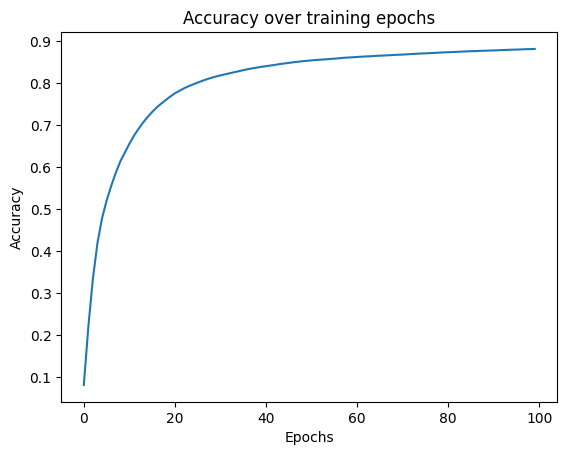

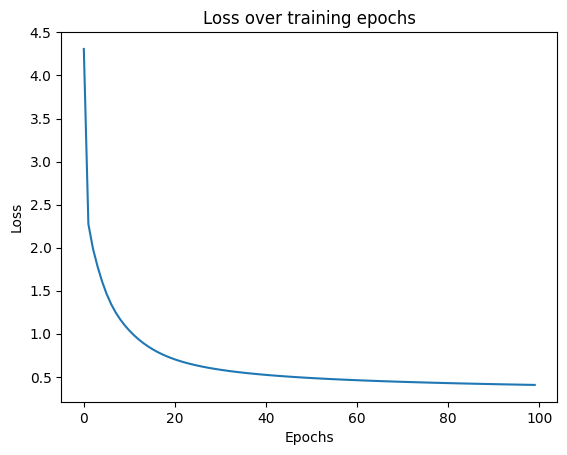

In [7]:
plt.plot(accuracies)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over training epochs')
plt.show()

plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over training epochs')
plt.show()

In [8]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [2]
Label:  2


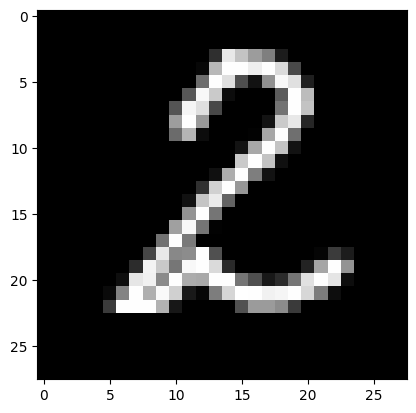

Prediction:  [7]
Label:  7


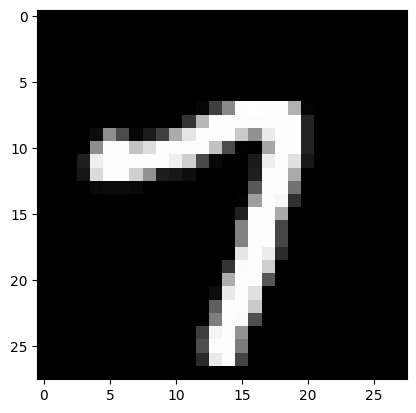

Prediction:  [5]
Label:  5


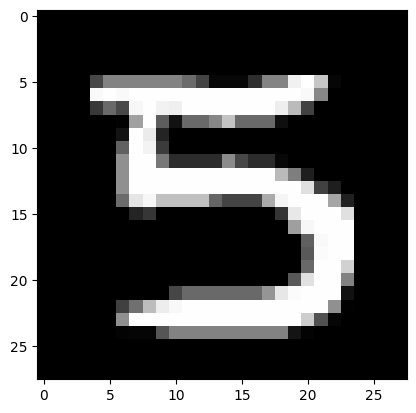

Prediction:  [3]
Label:  3


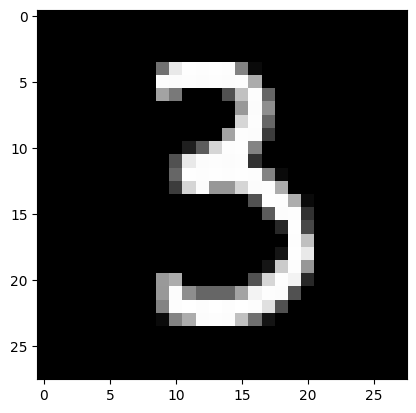

In [9]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [10]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[2 1 4 2 4 8 9 6 9 6 9 4 5 4 7 4 0 8 0 7 6 7 2 6 4 7 4 3 9 1 8 0 7 5 1 0 8
 6 3 1 1 5 8 2 1 6 6 6 4 4 6 4 8 7 7 6 9 4 6 3 9 4 3 1 3 1 7 4 3 9 7 9 6 3
 0 5 5 9 8 6 8 6 8 8 2 2 3 0 4 1 3 3 0 1 4 3 8 6 0 6 2 5 7 5 1 3 9 1 2 6 3
 1 3 6 2 5 0 7 5 8 7 8 9 9 2 3 1 1 3 9 3 4 4 2 6 8 1 8 0 1 4 2 7 6 6 9 5 7
 1 8 3 8 2 9 1 0 8 1 0 3 8 8 6 4 6 7 0 0 7 7 7 6 7 8 2 8 7 0 2 1 5 9 8 8 6
 5 2 7 7 3 9 0 3 9 0 9 6 9 7 1 5 5 7 4 9 7 2 9 1 6 8 0 2 0 6 4 9 6 9 4 5 5
 5 4 0 5 0 4 5 5 1 6 9 8 3 7 6 9 9 5 6 3 3 8 6 3 6 1 4 6 2 9 1 8 2 5 5 8 0
 1 5 7 8 8 0 4 5 3 6 3 7 5 1 6 6 1 8 4 6 1 5 5 1 9 6 0 8 2 8 6 5 8 0 3 7 6
 9 0 0 8 2 5 1 7 9 8 4 1 1 8 4 4 2 4 0 0 3 3 4 6 3 5 5 4 3 2 7 8 4 3 2 3 0
 6 8 1 2 8 2 5 1 2 7 1 7 9 4 1 2 3 6 9 9 1 6 5 3 6 1 1 7 9 0 1 4 5 7 1 6 3
 4 9 4 9 1 1 5 8 7 7 1 6 6 1 1 4 7 3 7 2 3 1 6 4 2 7 0 7 3 7 0 9 3 3 2 9 6
 7 0 4 0 3 7 0 4 6 8 7 8 3 9 9 4 6 9 8 2 3 5 6 3 3 6 4 0 1 7 8 0 7 1 1 0 7
 3 1 7 7 4 7 8 9 2 0 3 6 4 2 9 4 9 9 6 7 4 9 9 2 3 0 6 4 9 3 8 4 8 6 0 9 1
 5 9 2 4 7 6 1 5 0 2 3 0 

0.867